In [1]:
import numpy as np
import pandas as pd
from utils import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
total_solar_weather = np.load('total_solar_weather_pm_2013_2020.npy', allow_pickle=True)

In [14]:
locations = config_copy['experiments']['location_used']
loc_list = ['경상대', '남제주소내', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']
columns = config_copy['experiments']['features_used']

In [5]:
columns = ['발전률',
 '지점',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '풍향(16방위)',
 '습도(%)',     #!
 '증기압(hPa)', #!
 '이슬점온도(°C)',
 '현지기압(hPa)',   #!
 '해면기압(hPa)',
 '일조(hr)',    #!
 '일사(MJ__m2)',    #!
 '적설(cm)',
 '3시간신적설(cm)',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '운형(운형약어)',
 '최저운고(100m )',
 '시정(10m)',
 '지면상태(지면상태코드)',
 '현상번호(국내식)',
 '지면온도(°C)',    #!
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '지역',
 '망',
 '측정소코드',
 '측정소명',
 '측정일시',
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 '주소']

In [15]:
for loc in locations:
    if loc in loc_list:
        temp_data = pd.DataFrame(total_solar_weather[locations.index(loc)][35064:], columns=columns)
        temp_data.to_csv(f"./dataset/area/total_solar_weather_2017_2020_{loc}.csv", encoding='cp949', columns=columns)
    

PCC value 구하기

In [3]:
total_solar_weather[:, 35064:, 0].shape

(38, 35064)

In [4]:
locations = config_copy['experiments']['location_used']
columns = config_copy['experiments']['features_used']

In [26]:
feature_columns = ['발전률',
 '측정일시',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '습도(%)',     #!
 '증기압(hPa)', #!
 '현지기압(hPa)',   #!
 '일조(hr)',    #!
#  '일사(MJ__m2)',    #!
 '시정(10m)', 
 '지면온도(°C)',    #!
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 ]

##corr 구하기 위해서 feature별로 csv 파일 생성


for col in columns:
    temp_data = pd.DataFrame(total_solar_weather[:, 35064:, columns.index(col)].T, columns=locations)
    temp_data.to_csv(f"./dataset/features/total_area_2017_2020_{col}.csv", encoding='cp949')
    

##전체 

In [27]:
total_corr = pd.DataFrame(0.0, columns=locations, index=locations)
count = pd.DataFrame(0, columns=locations, index = ['count'])

for feature in feature_columns:
    try:
        print(feature)
        corr = pd.read_csv(f'./dataset/features/total_area_2017_2020_{feature}.csv', encoding='cp949', index_col=0)

        
        if feature == '강수량(mm)' or '일조(hr)' or '일사(MJ__m2)':
            corr = corr.fillna(0)
        else:
            corr = corr.ffill()
            corr = corr.bfill()
            
        corr = corr.corr()
        for loc0 in corr.columns:
            count[loc0] += 1
            for loc1 in corr.index:
                total_corr[loc0][loc1] += corr[loc0][loc1]
        
        
        corr.loc[loc_list, loc_list].to_csv(f'./dataset/corr/feature_corr_2017_2020_{feature}.csv', encoding='cp949')
    except:
        pass

발전률
측정일시
기온(°C)
강수량(mm)
풍속(m__s)
습도(%)
증기압(hPa)
현지기압(hPa)
일조(hr)
시정(10m)
지면온도(°C)
SO2
CO
O3
NO2
PM10
PM25


In [18]:
total_corr

,경상대,광양항세방,구미,남동발전_본사사옥,영동,예천,남제주소내,부산복합자재창고,부산복합1단계,부산수처리장,...,당진매립장_송악,당진자재창고,동해,수원환경사업소,황금물류센터,세종시폐기물매립장,연성정수장,영암에프원b,대구,신안
경상대,15.000000,8.512228,9.323235,15.000000,8.545201,7.815317,7.281069,9.029607,9.029607,9.029607,...,6.905222,6.905222,7.245170,8.520344,8.512228,8.732876,7.786973,8.199578,9.779397,9.261412
광양항세방,8.512228,15.000000,7.440398,8.512228,6.922998,6.756048,6.921582,7.532711,7.532711,7.532711,...,6.137622,6.137622,6.225622,7.200224,15.000000,7.358662,6.765590,7.141481,8.053209,7.798898
구미,9.323235,7.440398,15.000000,9.323235,8.814813,8.600547,6.457645,8.138734,8.138734,8.138734,...,6.683028,6.683028,7.609201,8.740877,7.440398,8.966387,8.276700,8.039980,10.297972,8.918607
남동발전_본사사옥,15.000000,8.512228,9.323235,15.000000,8.545201,7.815317,7.281069,9.029607,9.029607,9.029607,...,6.905222,6.905222,7.245170,8.520344,8.512228,8.732876,7.786973,8.199578,9.779397,9.261412
영동,8.545201,6.922998,8.814813,8.545201,15.000000,7.763367,6.211969,7.981113,7.981113,7.981113,...,8.489073,8.489073,7.682799,13.288421,6.922998,9.592238,10.854553,8.465214,8.747545,8.774744
예천,7.815317,6.756048,8.600547,7.815317,7.763367,15.000000,5.698345,6.936923,6.936923,6.936923,...,6.819755,6.819755,6.993626,8.105960,6.756048,8.122729,7.288310,7.110573,8.677335,7.285376
남제주소내,7.281069,6.921582,6.457645,7.281069,6.211969,5.698345,15.000000,7.308668,7.308668,7.308668,...,5.535239,5.535239,5.771065,6.309512,6.921582,6.601980,6.190103,6.950117,6.693168,7.446313
부산복합자재창고,9.029607,7.532711,8.138734,9.029607,7.981113,6.936923,7.308668,15.000000,15.000000,15.000000,...,6.353718,6.353718,7.303575,7.967918,7.532711,8.155757,7.639077,7.742189,9.017888,8.290630
부산복합1단계,9.029607,7.532711,8.138734,9.029607,7.981113,6.936923,7.308668,15.000000,15.000000,15.000000,...,6.353718,6.353718,7.303575,7.967918,7.532711,8.155757,7.639077,7.742189,9.017888,8.290630
부산수처리장,9.029607,7.532711,8.138734,9.029607,7.981113,6.936923,7.308668,15.000000,15.000000,15.000000,...,6.353718,6.353718,7.303575,7.967918,7.532711,8.155757,7.639077,7.742189,9.017888,8.290630


In [19]:
count

,경상대,광양항세방,구미,남동발전_본사사옥,영동,예천,남제주소내,부산복합자재창고,부산복합1단계,부산수처리장,...,당진매립장_송악,당진자재창고,동해,수원환경사업소,황금물류센터,세종시폐기물매립장,연성정수장,영암에프원b,대구,신안
count,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


['경상대', '광양항세방', '구미', '남동발전_본사사옥', '영동', '예천', '남제주소내', '부산복합자재창고',
       '부산복합1단계', '부산수처리장', '부산신항', '부산본부', '삼척소내', '신인천소내', '신인천전망대',
       '신인천해수취수구', '영월본부', '영월철도부지', '위미2리', '인천수산정수장', '하동공설운동장', '하동변전소',
       '하동보건소', '하동본부', '하동정수장', '하동하수처리장', '광양항', '당진', '당진매립장_송악', '당진자재창고',
       '동해', '수원환경사업소', '황금물류센터', '세종시폐기물매립장', '연성정수장', '영암에프원b', '대구', '신안']

In [28]:
total_corr.columns
loc_list = ['경상대', '남제주소내', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']


In [41]:
total_corr_avg = total_corr/17.0

In [42]:
total_corr_avg_loc = total_corr_avg.loc[loc_list, loc_list]

In [43]:
total_corr_avg_loc

,경상대,남제주소내,부산복합자재창고,영월본부,인천수산정수장,하동보건소,신안
경상대,1.000000,0.537638,0.643726,0.631372,0.583140,0.614744,0.655713
남제주소내,0.537638,1.000000,0.537917,0.473756,0.476522,0.515133,0.546783
부산복합자재창고,0.643726,0.537917,1.000000,0.568942,0.568932,0.551130,0.596653
영월본부,0.631372,0.473756,0.568942,1.000000,0.646939,0.517628,0.618946
인천수산정수장,0.583140,0.476522,0.568932,0.646939,1.000000,0.510106,0.607362
하동보건소,0.614744,0.515133,0.551130,0.517628,0.510106,1.000000,0.567970
신안,0.655713,0.546783,0.596653,0.618946,0.607362,0.567970,1.000000


for i in range(len(total_corr_avg_loc)):
    total_corr_avg_loc.iloc[i,i] = np.nan

In [ ]:
total_corr_avg_loc.to_csv('total_corr_avg_loc.csv', encoding='cp949')

In [11]:
total_corr_avg_loc = pd.read_csv('total_corr_avg_loc.csv', encoding='cp949', index_col=0)
total_corr_avg_loc

,경상대,예천,남제주소내,부산복합자재창고,영월본부,인천수산정수장,하동보건소,신안
경상대,NaN,0.518281,0.492375,0.614140,0.599221,0.542306,0.595032,0.619194
예천,0.518281,NaN,0.390100,0.475521,0.557326,0.482886,0.472878,0.484225
남제주소내,0.492375,0.390100,NaN,0.497347,0.434382,0.433540,0.487535,0.508874
부산복합자재창고,0.614140,0.475521,0.497347,NaN,0.542124,0.541783,0.527943,0.568242
영월본부,0.599221,0.557326,0.434382,0.542124,NaN,0.616429,0.491934,0.587607
인천수산정수장,0.542306,0.482886,0.433540,0.541783,0.616429,NaN,0.476378,0.571507
하동보건소,0.595032,0.472878,0.487535,0.527943,0.491934,0.476378,NaN,0.545357
신안,0.619194,0.484225,0.508874,0.568242,0.587607,0.571507,0.545357,NaN


In [30]:
total_corr_avg_loc.max(), total_corr_avg_loc.min()

(경상대         0.619194
 예천          0.557326
 남제주소내       0.508874
 부산복합자재창고    0.614140
 영월본부        0.616429
 인천수산정수장     0.616429
 하동보건소       0.595032
 신안          0.619194
 dtype: float64,
 경상대         0.492375
 예천          0.390100
 남제주소내       0.390100
 부산복합자재창고    0.475521
 영월본부        0.434382
 인천수산정수장     0.433540
 하동보건소       0.472878
 신안          0.484225
 dtype: float64)

## 지역간 날씨 유사도 PCC 평균값 그래프
### Q. 평균? 유사도별 가중치?

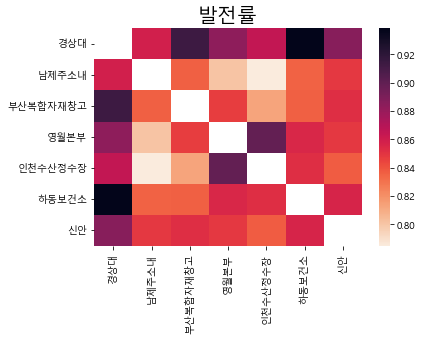

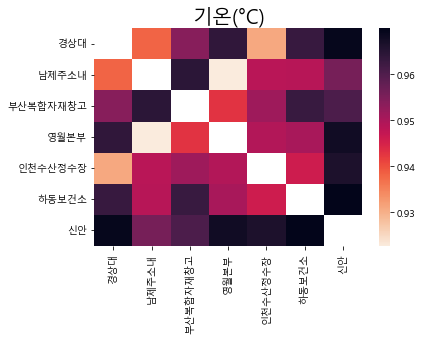

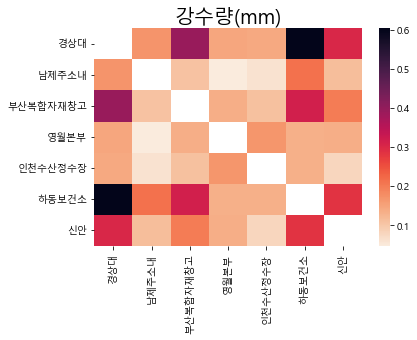

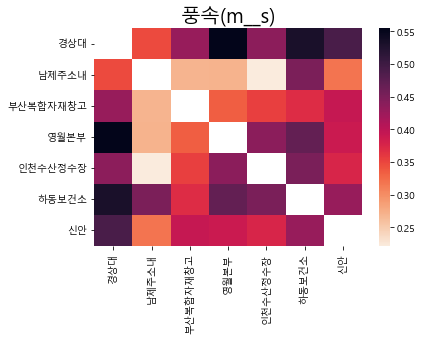

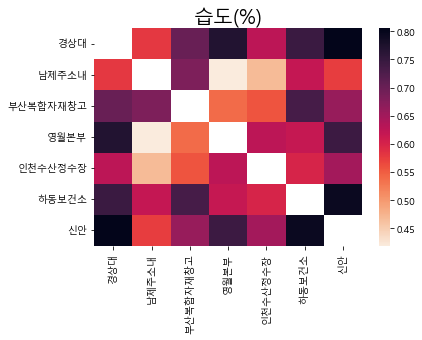

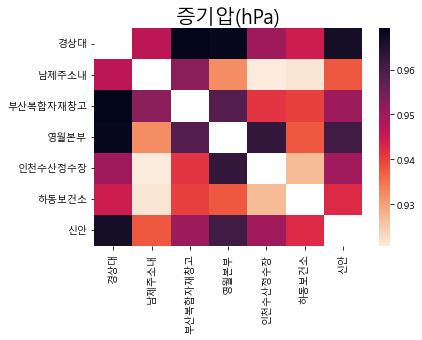

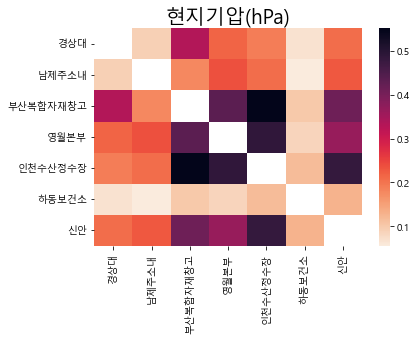

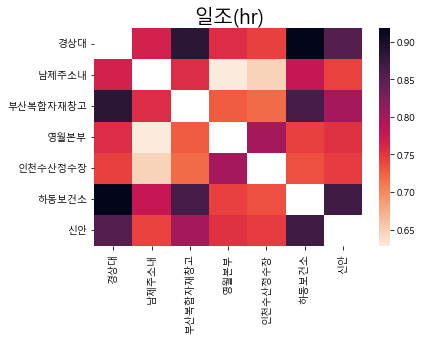

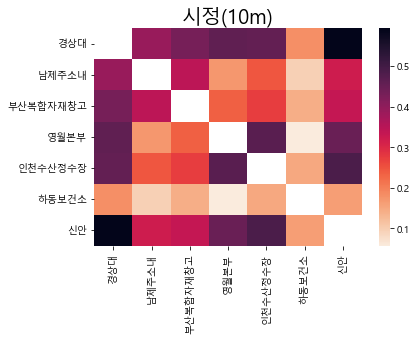

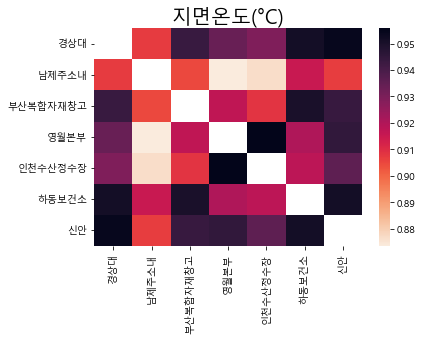

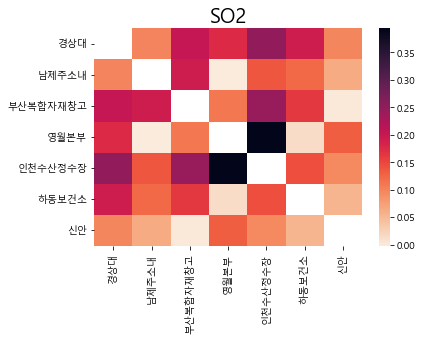

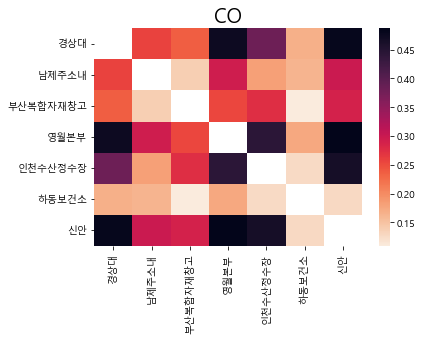

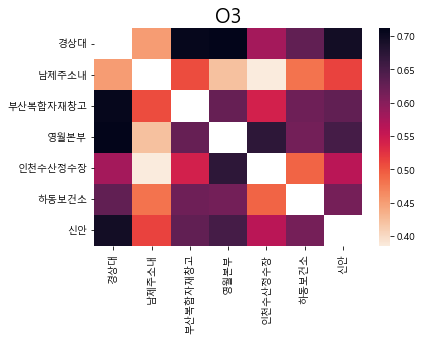

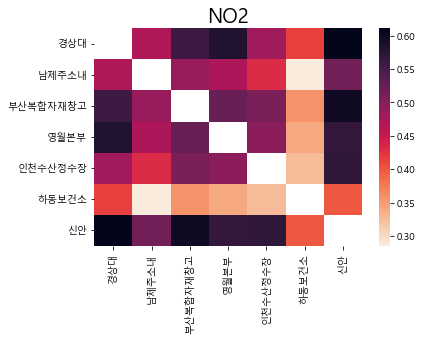

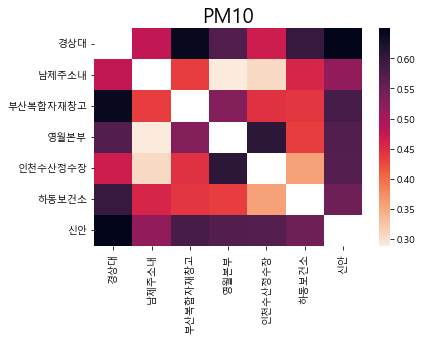

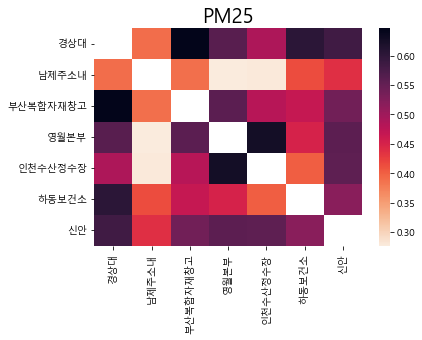

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
for feature in feature_columns:
    if feature == '측정일시':
        continue
    plt.figure()
    corr_matrix = pd.read_csv(f"./dataset/corr/feature_corr_2017_2020_{feature}.csv", encoding='cp949', index_col=0)
    for i in range(len(corr_matrix)):
        corr_matrix.iloc[i,i] = np.nan
    plt.title(f'{feature}', fontsize=20)
    sns.heatmap(corr_matrix, cmap='rocket_r')

In [54]:
solar_ratio = pd.read_csv(f"./dataset/corr/feature_corr_2017_2020_발전률.csv", encoding='cp949', index_col=0)
# solar_ratio = solar_ratio[loc_list]

In [60]:
solar_ratio
# solar_ratio_transform.corr()
#차이 없음

,경상대,남제주소내,부산복합자재창고,영월본부,인천수산정수장,하동보건소,신안
경상대,1.000000,0.858770,0.913741,0.883450,0.865082,0.938426,0.885709
남제주소내,0.858770,1.000000,0.835914,0.800988,0.784949,0.835677,0.849003
부산복합자재창고,0.913741,0.835914,1.000000,0.846818,0.812648,0.836497,0.852471
영월본부,0.883450,0.800988,0.846818,1.000000,0.898910,0.855255,0.848955
인천수산정수장,0.865082,0.784949,0.812648,0.898910,1.000000,0.852693,0.837497
하동보건소,0.938426,0.835677,0.836497,0.855255,0.852693,1.000000,0.856586
신안,0.885709,0.849003,0.852471,0.848955,0.837497,0.856586,1.000000


In [57]:
solar_ratio.max()

경상대         1.0
남제주소내       1.0
부산복합자재창고    1.0
영월본부        1.0
인천수산정수장     1.0
하동보건소       1.0
신안          1.0
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler      #MinMax 이상치 제거?
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

scaler.fit(solar_ratio)   
temp = solar_ratio
solar_ratio_transform = scaler.transform(solar_ratio)

In [ ]:
temp.to_numpy()[:] = solar_ratio_transform
solar_ratio_transform = temp

In [ ]:
solar_ratio_transform

,경상대,예천,남제주소내,부산복합자재창고,영월본부,인천수산정수장,하동보건소,신안
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
35059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
solar_ratio_transform.max()

경상대         1.0
예천          1.0
남제주소내       1.0
부산복합자재창고    1.0
영월본부        1.0
인천수산정수장     1.0
하동보건소       1.0
신안          1.0
dtype: float64

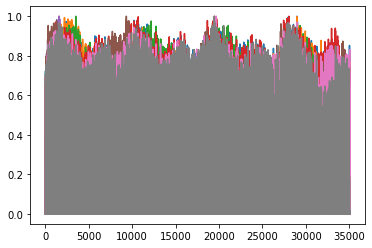

In [ ]:
plt.plot(solar_ratio_transform)

In [3]:
feature_columns = ['측정일시',
 '발전률',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '습도(%)',     #!
 '증기압(hPa)', #!
 '현지기압(hPa)',   #!
 '일조(hr)',    #!
#  '일사(MJ__m2)',    #!
 '지면온도(°C)',    #!
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 ]

In [62]:
# for i in loc_data.columns:
loc_data['PM25'] = loc_data['PM25'].ffill()

In [63]:
loc_data['PM25'][58]

79.0

In [64]:
feature == '강수량(mm)' or feature == '일조(hr)'

False

In [72]:
for loc in loc_list:
    loc_data = pd.read_csv(f"./dataset/area/total_solar_weather_2017_2020_{loc}.csv", encoding='cp949', index_col=0)
    loc_data = loc_data[feature_columns]
    for feature in loc_data.columns:
        # feature = ['PM10']
        if feature == '강수량(mm)' or feature == '일조(hr)' or feature == '발전률': #
            temp = loc_data[feature].fillna(0)
            loc_data[feature].to_numpy()[:] = temp
        else:
            loc_data[feature] = loc_data[feature].ffill()
            loc_data[feature] = loc_data[feature].bfill()
    print(loc_data.corr().iloc[0])
    loc_data.to_csv(f"./dataset/solar_weather_2017_2020_{loc}.csv", encoding='cp949', index=False)


발전률          1.000000
측정일시        -0.013241
기온(°C)       0.243226
강수량(mm)     -0.075952
풍속(m__s)     0.410628
습도(%)       -0.503371
증기압(hPa)    -0.057038
현지기압(hPa)    0.012563
일조(hr)       0.805358
시정(10m)      0.227845
지면온도(°C)     0.450913
SO2          0.149228
CO          -0.040481
O3           0.453621
NO2         -0.173898
PM10         0.085280
PM25         0.147652
Name: 발전률, dtype: float64
발전률          1.000000
측정일시        -0.062974
기온(°C)       0.213075
강수량(mm)     -0.062188
풍속(m__s)     0.180072
습도(%)       -0.228513
증기압(hPa)     0.064079
현지기압(hPa)   -0.001415
일조(hr)       0.730112
시정(10m)      0.142675
지면온도(°C)     0.560780
SO2          0.112037
CO          -0.059660
O3           0.288811
NO2         -0.177732
PM10         0.122103
PM25         0.035962
Name: 발전률, dtype: float64
발전률          1.000000
측정일시        -0.010686
기온(°C)       0.158897
강수량(mm)     -0.063498
풍속(m__s)     0.110564
습도(%)       -0.276795
증기압(hPa)    -0.015567
현지기압(hPa)    0.034358
일조(hr)       0.727581
시정

In [125]:
data = pd.read_csv(f"./dataset/solar_weather_2017_2020_{loc}.csv", encoding='cp949')

In [132]:
feature_columns

['측정일시',
 '발전률',
 '기온(°C)',
 '강수량(mm)',
 '풍속(m__s)',
 '습도(%)',
 '증기압(hPa)',
 '현지기압(hPa)',
 '일조(hr)',
 '지면온도(°C)',
 'SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25']

In [126]:
data = data[feature_columns]

,측정일시,발전률,기온(°C),강수량(mm),풍속(m__s),습도(%),증기압(hPa),현지기압(hPa),일조(hr),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25
0,2017010101,0.0,-2.4,0.0,0.0,85.0,4.4,1026.5,0.0,-1.3,0.002,0.8,0.010,0.024,60.0,26.0
1,2017010102,0.0,-3.0,0.0,0.1,86.0,4.2,1026.2,0.0,-1.5,0.003,0.8,0.008,0.027,51.0,32.0
2,2017010103,0.0,-3.1,0.0,0.0,87.0,4.2,1026.6,0.0,-1.7,0.002,0.7,0.011,0.021,53.0,29.0
3,2017010104,0.0,-3.5,0.0,0.1,88.0,4.2,1026.8,0.0,-1.8,0.002,0.7,0.008,0.020,46.0,22.0
4,2017010105,0.0,-3.6,0.0,0.3,88.0,4.1,1026.2,0.0,-1.9,0.006,0.8,0.007,0.023,45.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2020123120,0.0,0.1,0.0,3.4,56.0,3.5,1020.6,0.0,-0.4,0.005,0.4,0.026,0.012,7.0,0.0
35060,2020123121,0.0,-0.2,0.0,3.0,63.0,3.8,1020.9,0.0,-0.5,0.005,0.3,0.028,0.010,9.0,0.0
35061,2020123122,0.0,0.1,0.0,2.4,60.0,3.7,1020.8,0.0,-0.9,0.005,0.4,0.019,0.017,11.0,0.0
35062,2020123123,0.0,-0.9,0.0,0.5,65.0,3.7,1021.0,0.0,-1.3,0.006,0.4,0.009,0.025,11.0,2.0


------------

In [5]:
import argparse
import numpy as np
import pandas as pd
from utils import *
from models import CNN1
from dataset import KORDataset, KORCSVDataset

parser = argparse.ArgumentParser()

parser.add_argument('--device',type=str,default='cuda:0',help='')
# parser.add_argument('--data',type=str,default='./total_solar_weather_pm_2013_2020.npy',help='data path')
parser.add_argument('--batch_size',type=int,default=64,help='batch size')
parser.add_argument('--seq_len',type=int,default=3,help='seq len')

args = parser.parse_args(args=[])

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [6]:
feature_columns

['측정일시',
 '발전률',
 '기온(°C)',
 '강수량(mm)',
 '풍속(m__s)',
 '습도(%)',
 '증기압(hPa)',
 '현지기압(hPa)',
 '일조(hr)',
 '지면온도(°C)',
 'SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25']

In [8]:
feature_columns
loc_list = config['experiments']['location_used'].copy()

In [11]:
id(loc_list), id(config['experiments']['location_used'])

(1993607849920, 1994029861952)

In [21]:
temp_data = pd.read_csv(f'./dataset/solar_weather_2017_2020_경상대.csv', encoding='cp949')
temp_data.corr()['발전률']

측정일시        -0.013241
발전률          1.000000
기온(°C)       0.243226
강수량(mm)     -0.075952
풍속(m__s)     0.410628
습도(%)       -0.503371
증기압(hPa)    -0.057038
현지기압(hPa)    0.012563
일조(hr)       0.805358
지면온도(°C)     0.450913
SO2          0.149228
CO          -0.040481
O3           0.453621
NO2         -0.173898
PM10         0.085280
PM25         0.147652
Name: 발전률, dtype: float64

In [ ]:
for loc in loc_list:
    temp_data = pd.read_csv(f'./dataset/solar_weather_2017_2020_{loc}.csv', encoding='cp949')

In [14]:
for loc in loc_list:
    temp_data = pd.read_csv(f'./dataset/solar_weather_2017_2020_{loc}.csv', encoding='cp949')
    print(loc)
    print(temp_data)
    break
    # temp_data.to_csv(f"./dataset/features/total_area_2017_2020_{col}.csv", encoding='cp949')
    

경상대
             측정일시  발전률  기온(°C)  강수량(mm)  풍속(m__s)  습도(%)  증기압(hPa)  현지기압(hPa)  \
0      2017010101  0.0    -2.4      0.0       0.0   85.0       4.4     1026.5   
1      2017010102  0.0    -3.0      0.0       0.1   86.0       4.2     1026.2   
2      2017010103  0.0    -3.1      0.0       0.0   87.0       4.2     1026.6   
3      2017010104  0.0    -3.5      0.0       0.1   88.0       4.2     1026.8   
4      2017010105  0.0    -3.6      0.0       0.3   88.0       4.1     1026.2   
...           ...  ...     ...      ...       ...    ...       ...        ...   
35059  2020123120  0.0     0.1      0.0       3.4   56.0       3.5     1020.6   
35060  2020123121  0.0    -0.2      0.0       3.0   63.0       3.8     1020.9   
35061  2020123122  0.0     0.1      0.0       2.4   60.0       3.7     1020.8   
35062  2020123123  0.0    -0.9      0.0       0.5   65.0       3.7     1021.0   
35063  2020123124  0.0    -3.1      0.0       0.6   74.0       3.6     1021.7   

       일조(hr)  지면온도(°C)

In [77]:
for loc in loc_list:
    train = KORCSVDataset(args.seq_len, locals=0, features = feature_columns, data_path=f"./dataset/solar_weather_2017_2020_{loc}.csv")

TypeError: _get_idx() takes 1 positional argument but 2 were given

In [129]:
model = CNN1()

In [113]:
config['experiments']['location_used']

['부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']

In [19]:
loc_list_full = loc_list[:]

In [20]:
loc_list_full

['경상대', '남제주소내', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']

In [32]:
loc_list = loc_list_full[:]
train_loc = loc_list[1]

In [33]:
loc_list.remove(train_loc)

In [34]:
loc_list

['경상대', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']